In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

In [121]:
df = pd.read_csv('tarifas_direto.csv')
#df['%TUSD'] = df['Total TUSD'] / (df['Total TE'] + df['Total TUSD'])

# Análise TUSD FIO B

In [124]:
#Considerando todas as tarifas B1 Convencional Residencial
#ranking de concessionarias com maior porcentagem de TUSD Fio B em relação a TE + TUSD
df_interesse = df[(df['SUBGRUPO'] == 'B1') & (df['MODALIDADE'] == 'Convencional')
& (df['SUBCLASSE'] == 'Residencial')]
df_interesse['%TUSD_FioB'] = df_interesse['TUSD_FioB'] / (df_interesse['Total TE'] + df_interesse['Total TUSD'])
df_interesse

C:\Users\iagom\AppData\Local\Temp\ipykernel_7728\1242210462.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interesse['%TUSD_FioB'] = df_interesse['TUSD_FioB'] / (df_interesse['Total TE'] + df_interesse['Total TUSD'])


,CONCESSIONARIA,SUBGRUPO,MODALIDADE,CLASSE,SUBCLASSE,DETALHE,POSTO,UNIDADE,ACESSANTE,Total TE,Total TUSD,TUSD_FioB,%TUSD_FioB
30,AME,B1,Convencional,Residencial,Residencial,Não se aplica,Não se aplica,MWh,Não se aplica,288.04,546.81,239.327455,0.286671
77,Boa Vista,B1,Convencional,Residencial,Residencial,Não se aplica,Não se aplica,MWh,Não se aplica,336.18,398.95,247.737150,0.336998
123,CASTRO - DIS,B1,Convencional,Residencial,Residencial,Não se aplica,Não se aplica,MWh,Não se aplica,201.63,264.67,81.750035,0.175316
196,CEA,B1,Convencional,Residencial,Residencial,Não se aplica,Não se aplica,MWh,Não se aplica,224.48,497.19,280.914240,0.389256
287,CEB,B1,Convencional,Residencial,Residencial,Não se aplica,Não se aplica,MWh,Não se aplica,353.03,345.68,111.483868,0.159557
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362,FORCEL,B1,Convencional,Residencial,Residencial,Não se aplica,Não se aplica,MWh,Não se aplica,207.63,350.41,194.831472,0.349135
6409,HIDROPAN,B1,Convencional,Residencial,Residencial,Não se aplica,Não se aplica,MWh,Não se aplica,248.90,313.91,169.015484,0.300306
6507,LIGHT,B1,Convencional,Residencial,Residencial,Não se aplica,Não se aplica,MWh,Não se aplica,354.82,447.38,166.587892,0.207664
6565,SULGIPE,B1,Convencional,Residencial,Residencial,Não se aplica,Não se aplica,MWh,Não se aplica,220.05,421.64,271.069733,0.422431


([0, 1, 2, 3, 4],
 [Text(0, 0, 'COOPERSUL'),
  Text(1, 0, 'COPREL'),
  Text(2, 0, 'CEB'),
  Text(3, 0, 'CASTRO - DIS'),
  Text(4, 0, 'COOPERMILA')])

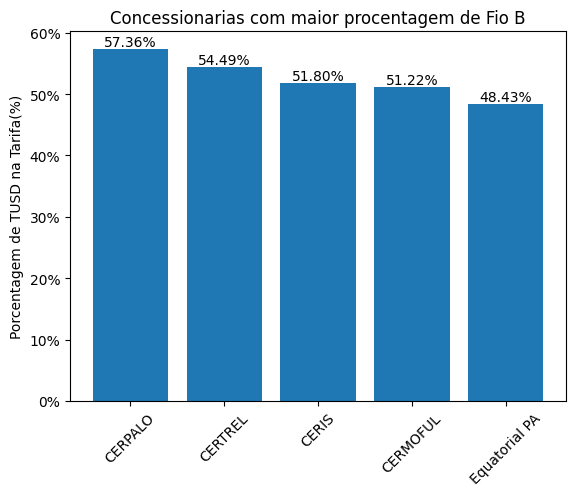

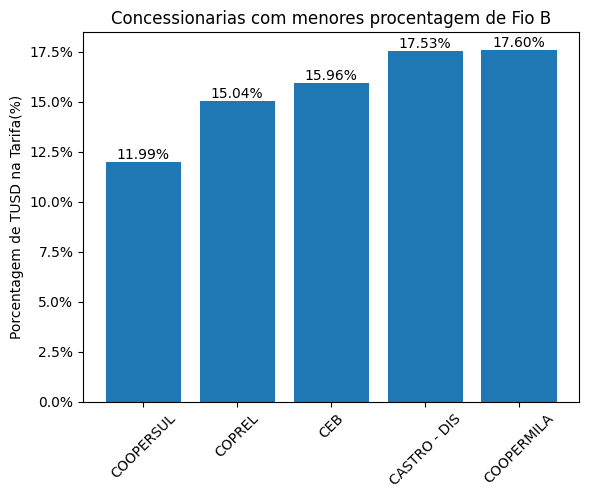

In [130]:
#Seleciona as 5 concessionarias com maior porcentagem de TUSD
#Seleciona com base no filtro anterior
n_maiores = df_interesse.nlargest(5, '%TUSD_FioB')
n_menores = df_interesse.nsmallest(5, '%TUSD_FioB')

fig, ax = plt.subplots()
bar_container = ax.bar(n_maiores['CONCESSIONARIA'], n_maiores['%TUSD_FioB'])
ax.set(ylabel='Porcentagem de TUSD na Tarifa(%)', title='Concessionarias com maior procentagem de Fio B')
ax.bar_label(bar_container, fmt='{:.2%}')

#Format as percent
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(rotation = 45)



fig2, ax2 = plt.subplots()
bar_container2 = ax2.bar(n_menores['CONCESSIONARIA'], n_menores['%TUSD_FioB'])
ax2.set(ylabel='Porcentagem de TUSD na Tarifa(%)', title='Concessionarias com menores procentagem de Fio B')
ax2.bar_label(bar_container2, fmt='{:.2%}')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(rotation = 45)


# Dimensionamento Grupo A

### Gerando a tabela e calculando os fatores de ajuste para cada posto tarifário de cada concessionária

In [106]:
#Faz uma lista com todas as concessionárias da tabela
concessionarias = df['CONCESSIONARIA'].unique()
#Seleciona os subgrupos pertencentes a Grupo A
subgrupos = ['A1', 'A2', 'A3', 'A3a', 'A4', 'AS']
#Seleciona as modalidades azul e verde, que são as binomias
modalidades = ['Azul', 'Verde']

df_fAjuste = pd.DataFrame(columns=['CONCESSIONARIA', 'SUBGRUPO', 'MODALIDADE', 
                                   'TE FORA PONTA', 'TE PONTA','FATOR AJUSTE'])

for concessionaria in concessionarias:
    for subgrupo in subgrupos:
        for modalidade in modalidades:
            try:
                teForaPonta = df[(df['CONCESSIONARIA'] == concessionaria) &
                     (df['SUBGRUPO'] == subgrupo) &
                     (df['MODALIDADE'] == modalidade) &
                     (df['Total TE'] > 0) &
                     (df['POSTO'] == 'Fora ponta')]['Total TE'].iloc[0]
                tePonta = df[(df['CONCESSIONARIA'] == concessionaria) &
                             (df['SUBGRUPO'] == subgrupo) &
                             (df['MODALIDADE'] == modalidade) &
                             (df['Total TE'] > 0) &
                             (df['POSTO'] == 'Ponta')]['Total TE'].iloc[0]
                fAjuste = teForaPonta / tePonta
                
                
                entry = pd.DataFrame.from_dict({
                    'CONCESSIONARIA': [concessionaria],
                    'SUBGRUPO': [subgrupo],
                    'MODALIDADE': [modalidade],
                    'TE FORA PONTA': [teForaPonta],
                    'TE PONTA': [tePonta],
                    'FATOR AJUSTE': [fAjuste]
                })
                df_fAjuste = pd.concat([df_fAjuste, entry], ignore_index=True)
            except:
                continue

df_fAjuste.to_csv('fatorAjuste.csv')
df_fAjuste

### Energia Gerada Fora Ponta para Compensar energia consumida na Ponta

In [133]:
consumoPonta = 1000
consumoForaPonta = 5000

# Energia Ponta ajustada Fora Ponta
consumoPontaAjustado = consumoPonta / fAjuste
print(f'Geração para compensar consumo fora Ponta: {round(consumoPontaAjustado,2)} kWh')

print(f'Geração Total Necessária (Fora Ponta + Ponta Ajustado): {round(consumoPontaAjustado + consumoForaPonta,2)} kWh')

Geração para compensar consumo fora Ponta: 1589.64 kWh
Geração Total Necessária (Fora Ponta + Ponta Ajustado): 6589.64 kWh


## Tarifas por Estado

In [142]:
df

,CONCESSIONARIA,SUBGRUPO,MODALIDADE,CLASSE,SUBCLASSE,DETALHE,POSTO,UNIDADE,ACESSANTE,Total TE,Total TUSD,TUSD_FioB
0,AME,A3,Azul,Não se aplica,Não se aplica,APE,Ponta,MWh,Não se aplica,0.00,31.69,0.000000
1,AME,A3,Azul,Não se aplica,Não se aplica,APE,Ponta,kW,Não se aplica,0.00,8.74,4.185401
2,AME,A3,Azul,Não se aplica,Não se aplica,APE,Fora ponta,MWh,Não se aplica,0.00,31.69,0.000000
3,AME,A3,Azul,Não se aplica,Não se aplica,APE,Fora ponta,kW,Não se aplica,0.00,7.12,3.402224
4,AME,A3,Azul,Não se aplica,Não se aplica,Não se aplica,Ponta,MWh,Não se aplica,456.17,84.42,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
6635,UHENPAL,B3,Branca,Não se aplica,Não se aplica,Não se aplica,Fora ponta,MWh,Não se aplica,195.90,357.06,167.296769
6636,UHENPAL,B3,Convencional,Não se aplica,Não se aplica,Não se aplica,Não se aplica,MWh,Não se aplica,205.52,446.02,232.356636
6637,UHENPAL,B3,Convencional pré-pagamento,Não se aplica,Não se aplica,Não se aplica,Não se aplica,MWh,Não se aplica,205.52,446.02,232.356636
6638,UHENPAL,B4,Convencional,Iluminação pública,Iluminação pública – B4a,Não se aplica,Não se aplica,MWh,Não se aplica,113.04,245.31,127.796150


In [143]:
caminho = r'C:\Users\iagom\OneDrive\Estudos\Python\Tarifas_Aneel\AreaatuadistbaseBI (3).xlsx'
planilha_estados = pd.ExcelFile(caminho, engine = 'openpyxl')
df_estados = pd.read_excel(planilha_estados)
df_estados

inner_join = pd.merge(df, df_estados, left_on='CONCESSIONARIA', right_on='SIGLA', how='inner')

In [146]:
inner_join.iloc[0]

CONCESSIONARIA                                                        AME
SUBGRUPO                                                               A3
MODALIDADE                                                           Azul
CLASSE                                                      Não se aplica
SUBCLASSE                                                   Não se aplica
DETALHE                                                               APE
POSTO                                                               Ponta
UNIDADE                                                               MWh
ACESSANTE                                                   Não se aplica
Total TE                                                              0.0
Total TUSD                                                          31.69
TUSD_FioB                                                             0.0
Código ARAT                                                 C.069.AM.2001
SIGLA                                 